In [2032]:
# import packages

import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2033]:
# import all data

directory =r"C:\Users\jason\DataspellProjects\dsProject\Txt_Files"
weather_location = r"C:\Users\jason\OneDrive - University of South Carolina\Desktop\Project Data\Fenway Project\Weather Data\3027420.csv"
baseball_location = r"C:\Users\jason\OneDrive - University of South Carolina\Desktop\Project Data\Fenway Project\NewBaseball_Data.csv"

filenames = os.scandir(directory)
with open('output.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read().rstrip() + '\n')

baseball_data = pd.read_csv(baseball_location)
weather_data = pd.read_csv(weather_location)

In [2034]:
# convert txt file to DataFrame and see a preview

raw_data = pd.read_csv(r'output.txt', dtype=object)

# Create Column Names

col_names = ['date', 'day_game_number', 'day_of_week', 'away','away_league', 'away_game_num', 'home', 'home_league', 'home_game_num', 'away_score', 'home_score', 'outs_number','time_of_day', 'completion', 'forfeit', 'protest', 'park_id', 'attendance', 'game_time_min', 'away_line_score', 'home_line_score', 'away_ab', 'away_hits', 'away_doubles', 'away_triples', 'away_hr', 'away_rbi', 'away_sac_hits','away_sac_flies', 'away_hbp', 'away_BB', 'away_IBB', 'away_k', 'away_SB', 'away_CS', 'away_GIDP', 'away_interference', 'away_LOB', 'away_pitchers_used', 'away_pitcher_ER', 'away_team_ER', 'away_WP','away_balks', 'away_PO', 'away_assists','away_errors', 'away_PB', 'away_DP', 'away_TP','home_ab', 'home_hits', 'home_doubles', 'home_triples', 'home_hr', 'home_rbi', 'home_sac_hits','away_sac_flies', 'home_hbp', 'home_BB', 'home_IBB', 'home_k', 'home_SB', 'home_CS', 'home_GIDP', 'home_interference', 'home_LOB', 'home_pitchers_used', 'home_pitcher_ER', 'home_team_ER', 'home_WP','home_balks', 'home_PO', 'home_assists','home_errors', 'home_PB', 'home_DP', 'home_TP','home_ump_id', 'home_ump_name','1b_ump_id', '1b_ump_name','2b_ump_id', '2b_ump_name','3b_ump_id', '3b_ump_name','LF_ump_id', 'LF_ump_name','RF_ump_id', 'RF_ump_name','away_manager_id', 'away_manager_name','home_manager_id', 'home_manager_name','WP_id','WP_name', 'LP_id', 'LP_name','saver_id','saver_name','gw_rbi_id','gw_rbi_name', 'away_SP_id', 'away_SP_name', 'home_SP_id', 'home_SP_name','away_1hitter_id','away_1hitter_name','away_1hitter_position','away_2hitter_id','away_2hitter_name','away_2hitter_position','away_3hitter_id','away_3hitter_name','away_3hitter_position','away_4hitter_id','away_4hitter_name','away_4hitter_position','away_5hitter_id','away_5hitter_name','away_5hitter_position','away_6hitter_id','away_6hitter_name','away_6hitter_position','away_7hitter_id','away_7hitter_name','away_7hitter_position','away_8hitter_id','away_8hitter_name','away_8hitter_position','away_9hitter_id','away_9hitter_name','away_9hitter_position','home_1hitter_id','home_1hitter_name','home_1hitter_position','home_2hitter_id','home_2hitter_name','home_2hitter_position','home_3hitter_id','home_3hitter_name','home_3hitter_position','home_4hitter_id','home_4hitter_name','home_4hitter_position','home_5hitter_id','home_5hitter_name','home_5hitter_position','home_6hitter_id','home_6hitter_name','home_6hitter_position','home_7hitter_id','home_7hitter_name','home_7hitter_position','home_8hitter_id','home_8hitter_name','home_8hitter_position','home_9hitter_id','home_9hitter_name','home_9hitter_position','add_info','acq_info']

# add column names to DataFrame

raw_data.columns = col_names

# convert date to UTC

raw_data['date'] = pd.to_datetime(raw_data['date'])

# segment data into last 50 years and reset the index

modern_data = raw_data[raw_data.date.dt.year > 1974]
modern_data.index = pd.RangeIndex(start = 0, stop = int(len(modern_data)))

# filter for Red Sox home games

redsox_homegames = modern_data[modern_data['home'] == 'BOS']
redsox_homegames.index = pd.RangeIndex(start = 0, stop = int(len(redsox_homegames)))

In [2035]:
# Create DataFrame of Useable Variables

redsox_usable = redsox_homegames[['date', 'day_of_week', 'away', 'home', 'away_score', 'home_score', 'time_of_day', 'attendance']]
# Convert Weather Data Date Format & Reorder Columns

weather_data['date'] = pd.to_datetime(weather_data['DATE'])
weather_data = weather_data[['STATION', 'NAME', 'date', 'AWND', 'PRCP', 'PSUN', 'TAVG', 'TMAX', 'TMIN']]

# Combine 2 DataFrames for all necessary data
partial_data = pd.merge(redsox_usable, weather_data[['date','AWND', 'PRCP', 'PSUN', 'TAVG','TMAX', 'TMIN']], on = 'date')

In [ ]:
# Create Custom Variables

partial_data['mid_temp'] = partial_data['TMAX'] -(partial_data['TMAX'] - partial_data['TMIN'])/2
partial_data['result'] = 0

# Create classification lists for result boost
missed_playoffs = [1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1987, 1989, 1991, 1992, 1993, 1994,1995, 1996, 1997, 2000, 2001, 2002, 2006, 2010, 2011, 2012, 2014, 2015, 2019, 2020]
lost_alds = [1995, 1998, 2005, 2009, 2016, 2017]
alds = [1988, 1990, 1999, 2003, 2008, 2021]
alcs = [1975, 1986]
ws = [2004, 2007, 2013, 2018]

years_list = partial_data['date'].dt.year

# incorporate result boost based on year-end result
for i, j in enumerate(years_list):
    if j in missed_playoffs:
        partial_data['result'][i] = 0.95
    elif j in lost_alds:
        partial_data['result'][i] = 1.01
    elif j in alds:
        partial_data['result'][i] = 1.02
    elif j in alcs:
        partial_data['result'][i] = 1.03
    else:
        partial_data['result'][i] = 1.05

partial_data['seas_adj_attendance'] = partial_data['attendance'].astype('float') * partial_data['result']

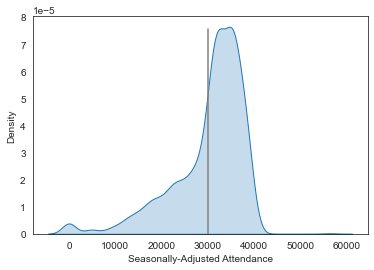

In [2037]:
# plot attendance adjusted for result

sns.set_style('white')
sns.kdeplot(x= 'seas_adj_attendance', data = partial_data, fill = True)
plt.xlabel('Seasonally-Adjusted Attendance')
plt.axvline(x = np.mean(partial_data['seas_adj_attendance']), ymin = 0, ymax =.94, color = 'gray')

In [2038]:
# Add additional columns for additional baseball data

columns = ['Year', 'Lg', 'W', 'L', 'Finish', 'RA/G', 'ERA', 'CG', 'tSho', 'SV','IP', 'H_Pitch', 'R_Pitch', 'ER', 'HR_Pitch', 'BB_Pitch', 'SO_Pitch','WHIP', 'SO9', 'HR9', 'DP', 'Fld%', 'PAge', 'PA', 'AB', 'R_Bat', 'H_Bat', '2B', '3B', 'HR_Bat', 'RBI', 'SB', 'CS', 'BB_Bat', 'SO_Bat', 'BA', 'OBP', 'SLG', 'OPS', 'DP.1', 'Fld%.1']

# Match day-by-day game data with year-by-year averages

years_unique = years_list.value_counts()

years_keys = years_unique.keys().sort_values()

full_data = []

for i in years_keys:
    data = pd.concat([baseball_data[baseball_data['Year'] == i]]*years_unique[i]).sort_index()
    full_data.append(data)

fill_data = pd.concat(full_data)
fill_data.reset_index(inplace = True)
fill_data['date'] = np.flip(partial_data['date'])

fill_data['index'] = fill_data['date']
fill_data['index'] = pd.to_datetime(fill_data['index'])
fill_data.drop(new_data.columns[-1], axis = 1, inplace = True)
fill_data.rename(columns = {'index':'date'}, inplace = True)
final_data = partial_data.merge(fill_data, how  = 'left', on = 'date')
final_data['attendance'] = final_data['attendance'].astype('float')

final_data = final_data[final_data['attendance'] > 0]
final_data = final_data[final_data.duplicated() == False]

In [2039]:
# Convert weekdays into Dummy Variables

dummies = pd.get_dummies(data = final_data[['day_of_week', 'time_of_day']], drop_first= False)
dummies['date'] = final_data['date']


In [2040]:
# prep model data

final_data['PRCP'] = final_data['PRCP'].astype('float')
final_data['PSUN'] = final_data['PSUN'].astype('float')

inter_data = pd.merge(final_data, dummies, on ='date')

In [2041]:
# Fill na's w/ Average Value

inter_data['seas_adj_attendance'] = inter_data['seas_adj_attendance'].fillna(np.mean(inter_data['seas_adj_attendance']))
inter_data['PRCP'] = inter_data['PRCP'].fillna(np.mean(inter_data['PRCP']))
inter_data['PSUN'] = inter_data['PSUN'].fillna(np.mean(inter_data['PSUN']))

In [ ]:
# Remove outliers

filler_outfree = pd.DataFrame()

# Columns that are excluded from outliers (more rain, more sun could have influence)

keep_cols = ['PRCP', 'PSUN']

for col in inter_data.columns:
    if inter_data[col].dtype == 'uint8':
        filler_outfree[col] = inter_data[col]
    elif col in keep_cols:
        filler_outfree[col] = inter_data[col]
    elif inter_data[col].dtype == 'object':
        None
    else:
        iqr = inter_data[col].quantile(.75) - inter_data[col].quantile(.25)
        upper_lim = inter_data[col].quantile(.75) + 1.5*iqr
        lower_lim = inter_data[col].quantile(.25) - 1.5*iqr
        column = inter_data[col][(inter_data[col] < upper_lim) & (inter_data[col] > lower_lim)]
        filler_outfree[col] = pd.concat([column])

dayweek_cols = ['day_of_week_Mon','day_of_week_Tue','day_of_week_Wed','day_of_week_Thu','day_of_week_Fri','day_of_week_Sat','day_of_week_Sun']
filler_outfree.reset_index(inplace = True)

for i, j in enumerate(filler_outfree):
    for col in dayweek_cols:
        filler_outfree[col][i] = inter_data[col][i]

model_data_outfree = filler_outfree.dropna()
model_data_outfree = model_data_outfree.reset_index()
model_data_outfree.drop(['level_0', 'index'], axis = 1, inplace = True)

<AxesSubplot:>

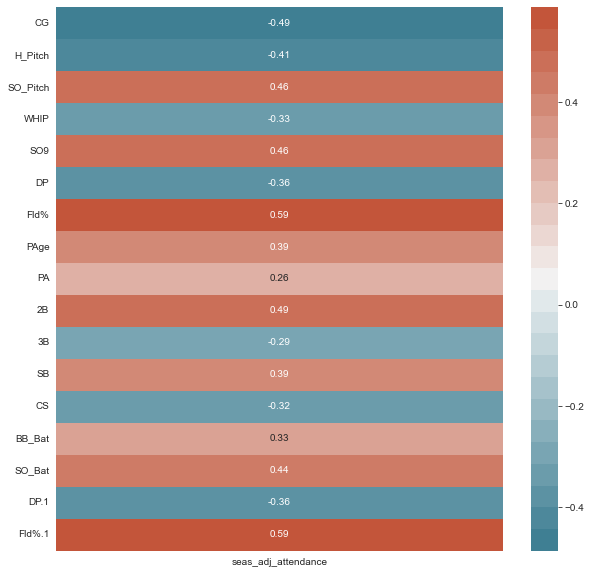

In [2043]:
# Determine Meaningful Correlations

correls = inter_data.corr(method='pearson')
correls_sig = pd.DataFrame(correls['seas_adj_attendance'][(correls['seas_adj_attendance'] > 0.25) | (correls['seas_adj_attendance'] < -0.25)])
correls_sig.reset_index(inplace = True)
correl_sig_cols = list(correls_sig['index'])
del correl_sig_cols[0:6]

# Heatmap of Meaningful Correlations
corr_df = pd.DataFrame(correls['seas_adj_attendance'][correl_sig_cols])
fig, ax  = plt.subplots(figsize = (10,10))
sns.heatmap(corr_df, annot = True, cmap= sns.diverging_palette(220, 20 , n=25))

In [2044]:
# Split into X and Y; Split into Train and Test

cat_cols = ['PRCP', 'PSUN', 'mid_temp', 'day_of_week_Fri', 'day_of_week_Mon','day_of_week_Sat', 'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue', 'day_of_week_Wed', 'time_of_day_D', 'time_of_day_N']

all_cols = correl_sig_cols + cat_cols

X = model_data_outfree[all_cols]
Y = model_data_outfree['seas_adj_attendance']

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size= 0.2)

In [2045]:
# scale numeric features

scaler = StandardScaler()
X_train[correl_sig_cols] = scaler.fit_transform(X_train[correl_sig_cols])
X_test[correl_sig_cols] = scaler.transform(X_test[correl_sig_cols])

In [ ]:
# Build base of model

model = sk.linear_model.LassoCV(cv = 5, random_state= 0 , max_iter= 10000)
model.fit(X_train,Y_train)

In [2047]:
# Model on Train Data

Y_pred_train = model.predict(X_train)

r2_train = sk.metrics.r2_score(Y_train, Y_pred_train)
rmse_train = np.sqrt(sk.metrics.mean_squared_error(Y_train, Y_pred_train))

print('Intercept:', model.intercept_)
print('Root Mean squared error (RMSE):' , rmse_train)
print('R^2:', r2_train)

Intercept: 27402.453815422574
Root Mean squared error (RMSE): 2096.373234159788
R^2: 0.6628401906029746


In [2048]:
# Model on Test Data

Y_pred_test = model.predict(X_test)

r2_test = sk.metrics.r2_score(Y_test, Y_pred_test)
rmse_test = np.sqrt(sk.metrics.mean_squared_error(Y_test, Y_pred_test))

print('Intercept:', model.intercept_)
print('Root Mean squared error (RMSE):' , rmse_test)
print('R^2:', r2_test)

Intercept: 27402.453815422574
Root Mean squared error (RMSE): 2278.637173830368
R^2: 0.6593653785602362
